In [1]:
from fastai import *
from fastai.vision import *
from fastai.docs import *

In [6]:
dpath = "/home/justin/all_data/dogs-vs-cats/"
tr_path = dpath+'train/'
te_path = dpath+'test/'

In [15]:
cattr_path = tr_path+'cats/'
dogtr_path = tr_path+'dogs/'

In [18]:
os.makedirs(cattr_path, exist_ok=True)
os.makedirs(dogtr_path, exist_ok=True)

# data setup

In [21]:
for fn in os.listdir(tr_path):
    if os.path.isfile(tr_path+fn):
        if 'dog' in fn:
            os.rename(tr_path+fn, dogtr_path+fn)
        if 'cat' in fn:
            os.rename(tr_path+fn, cattr_path+fn)    

In [36]:
# mkdir {dpath}all_train
# cp -r {tr_path}* {dpath}all_train

In [39]:
# mkdir {dpath}valid/
# mkdir {dpath}valid/cats
# mkdir {dpath}valid/dogs

In [50]:
mv_valid = 1000
valid_i = np.random.choice(np.arange(12500), size=mv_valid, replace=False)

In [53]:
classes = ['cats', 'dogs']
for c in classes:
    for i, fn in enumerate(os.listdir(tr_path+c)):
        if i in valid_i:
            os.rename(tr_path+c+'/'+fn, dpath+'valid/'+c+'/'+fn)

# modeling

In [109]:
data = image_data_from_folder(dpath, test='test', size=224, tfms=imagenet_norm, ds_tfms=get_transforms())

In [111]:
tr_ds = data.train_ds
img, label = tr_ds[0]

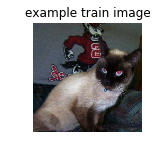

In [112]:
img.show(figsize=(2,2), title='example train image')
img.rotate(35)
plt.show()

In [121]:
learn = ConvLearner(data, tvm.resnet34, metrics=accuracy)

In [122]:
learn.fit_one_cycle(1)

Total time: 01:09
epoch  train loss  valid loss  accuracy
0      0.049893    0.037221    0.987500  (01:09)



In [123]:
learn.unfreeze()
learn.fit_one_cycle(6, slice(1e-5,3e-4), pct_start=0.05)

Total time: 07:20
epoch  train loss  valid loss  accuracy
0      0.036464    0.030297    0.987000  (01:13)
1      0.030618    0.025051    0.989500  (01:13)
2      0.022345    0.029666    0.991500  (01:13)
3      0.011990    0.023180    0.989000  (01:13)
4      0.008006    0.019862    0.991500  (01:13)
5      0.008368    0.020264    0.991500  (01:13)



In [124]:
accuracy(*learn.TTA())

Total time: 00:51



tensor(0.9915)

In [125]:
interp = ClassificationInterpretation.from_learner(learn)

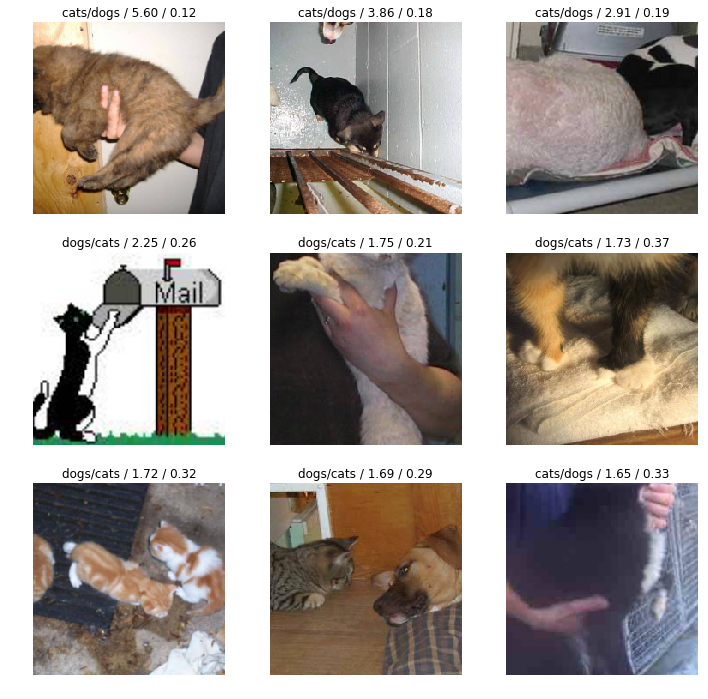

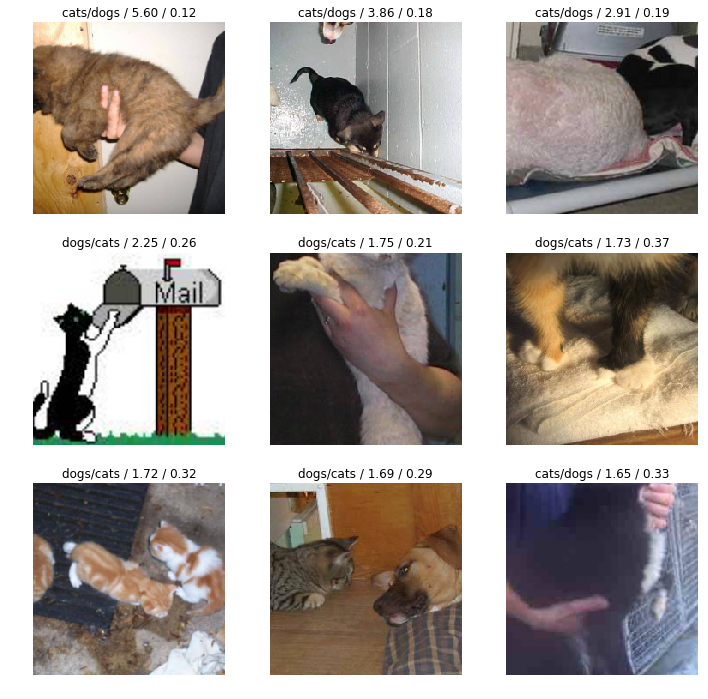

In [127]:
interp.plot_top_losses(9)
plt.show()

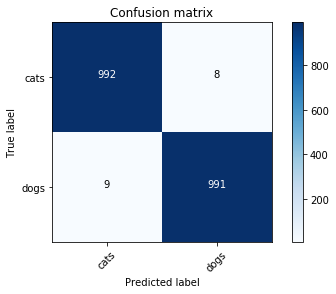

In [130]:
interp.plot_confusion_matrix()
plt.show()